<a href="https://colab.research.google.com/github/Ayazhannn/Machine-Learning-Daily-Projects/blob/main/Day%204%20Breast%20Cancer%20classification%20using%20Logisitc%20regression%2C%20KNN%2C%20Decision%20tree%20and%20Random%20Forest/Day4_Breast_Cancer_Model_Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 4

And yet i am still on Classification tasks.
But today i will try visualize their prediction with actual data, also show how model divided into classes. I am using another sklearn dataset - Breast Cancer.
The breast cancer dataset is a classic and very easy binary classification dataset.This dataset uses a machine learning algorithm to classify cancer scans as benign or malignant.

We have 2 classes benign and malignant. **Benign** tumor is when cells are not cancereous and won't spread. **Malignant** tumor is when cells are cancereous and can spread to other tissues and organs.

I will create **KNN, Logistic regression, Decision Tree** and ,one that i didn't try before, **Random Forest** classifications for this task.

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Data Exploration

In [7]:
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df.insert(0, 'target', breast_cancer.target)
df.tail()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
df.shape

(569, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

From data information it seen that there's no categorical data, that is why there's no need to use encoding like i did in previous project.

In [10]:
df.describe()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.isnull().sum()

target                     0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

No Null values here, that means no need for data imputation or other technics.

In [12]:
df.value_counts(df['target'])

target
1    357
0    212
dtype: int64

So Breast Cancer dataset has:

1. 2 Classes
2. Sample per classes 1 - 357, 0 - 212
3. Samples Total = 569
4. Dimensionality - 30

<Axes: xlabel='target', ylabel='count'>

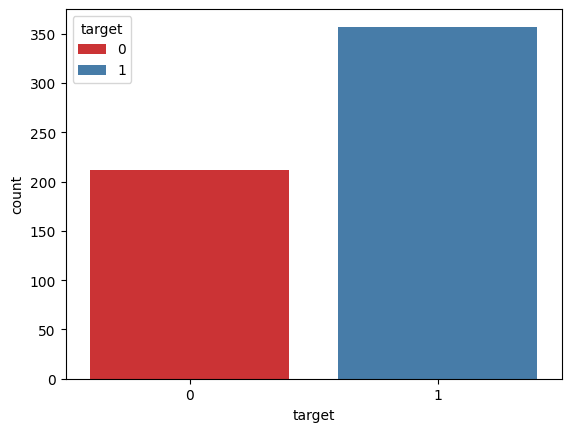

In [13]:
sns.countplot(x='target', hue='target', data=df, palette='Set1')

To see how well mean radius correlates with target, i'll plot the data
separated based on target category on the x-axis and have the points' y-value
be its mean radius value

<ipython-input-14-e037881414e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='target', y='mean radius', data=df, palette='Set1', legend=False)


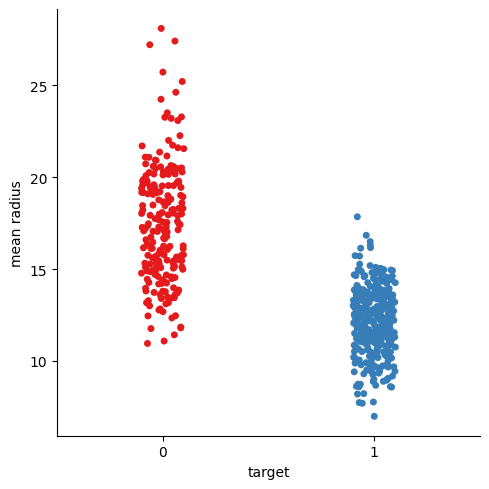

In [14]:
sns.catplot(x='target', y='mean radius', data=df, palette='Set1', legend=False)

Usually when we do correlation we choose every feature, but this time i decided to choose only valuable data that will give insight like radius,area,perimeter and others. The mean values of this columns for correlation analysis in the breast cancer dataset is a common practice because these features provide a useful summary statistic that can capture the general trend or central tendency of the cell nuclei characteristics.

<Axes: >

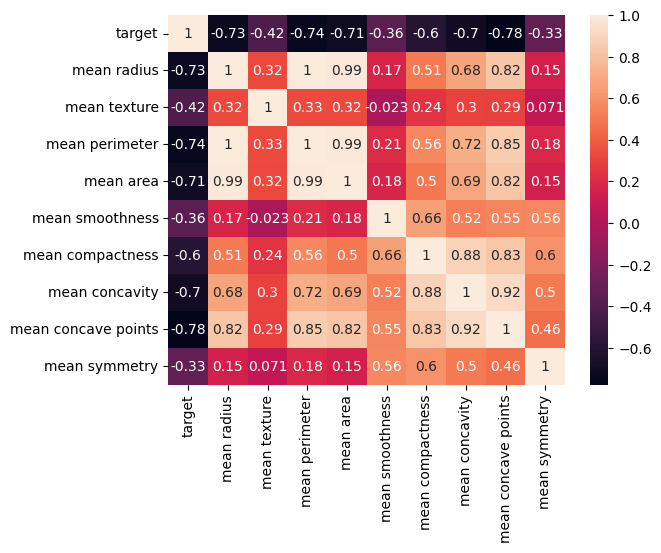

In [15]:
coor_data = df.iloc[:,:10]
sns.heatmap(coor_data.corr(method='pearson'), annot=True)

Main information that I got from this correlation Target has negative correaltion with every mean feature, which can indicate that lower values of these features means higher likelyhood of having malignant(cancerious) cells and vice-versa.

# Data Preparation

In [16]:
X = df.iloc[:, 1:].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [17]:
y = df.iloc[:, :1].values
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Logistic Regression

Logit Regression is the first algorithm that goes to mind when there's classification problem.It is one of the most simple,versatile and straightforward classification algorithm.

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [20]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0])

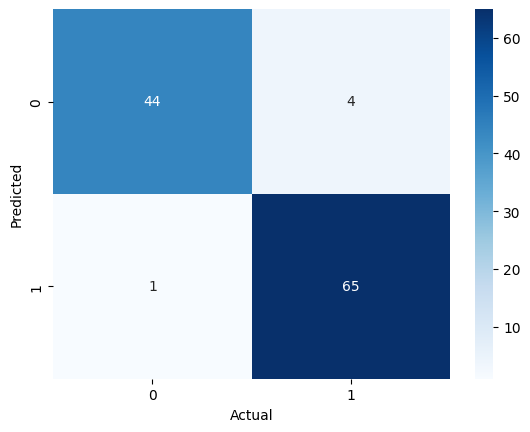

In [21]:
from sklearn.metrics import confusion_matrix
lr_cfm = confusion_matrix(y_test,lr_pred)

sns.heatmap(lr_cfm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

From Confusion Matrix it is evident that Logistic Regression did amazing job at predicting classes:


1.   Model accurately predicted 44 bening(false)class correctly, and predicted 1 incorrectly.
2.   65 of Melignant(True) class where correctly predicted, but model erroneously predicted 4 instances.



In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.94      0.98      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [23]:
lr_acc = lr.score(X_test,y_test)
lr_acc

0.956140350877193

In [24]:
y.shape

(569, 1)

Intercept (b): 23.501924935453303
Coefficients (m): [-0.31468106]
Coefficients (c): [190.33682167]


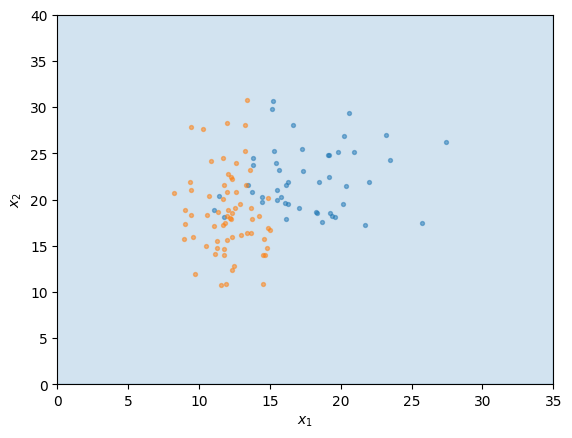

In [25]:
import numpy as np

b = lr.intercept_[0]
coef = lr.coef_.T
c = -(b/coef[1])
m = -(coef[0]/coef[1])
print("Intercept (b):", b)
print("Coefficients (m):", m)
print("Coefficients (c):", c)

xmin, xmax = 0, 35
ymin, ymax = 0, 40
xd = np.linspace(xmin, xmax, 100)
yd = m * xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.scatter(X_test[y_test.flatten()==0][:,0], X_test[y_test.flatten()==0][:,1], s=8, alpha=0.5)
plt.scatter(X_test[y_test.flatten()==1][:,0], X_test[y_test.flatten()==1][:,1], s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')
plt.show()


# KNN

KNN algorithn is really easy to understand. It simply calculates the distance between given data and all the training data points,and will assign given data to a class with the majority of k data points belong.Distance are calculated by different distance formulas like Euclidean ot Manhattan. In my case i chose Minkowski distance, it is a generalization of Eclidean and Manhattan distances, which means it learns principals of these technics and applies it. Minkowski has a parameter 1 = Manhattan, 2 = Euclidean.

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7, metric='minkowski', p=2)
knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [103]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0])

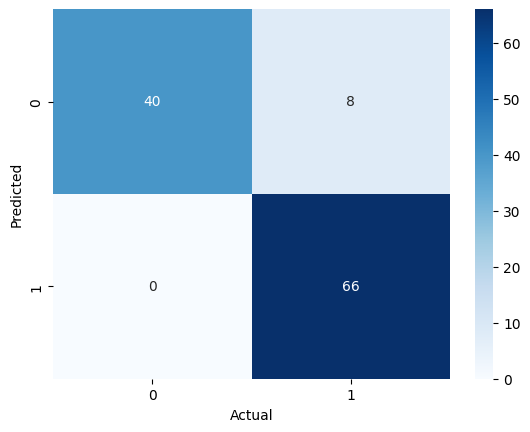

In [104]:
knn_cfm = confusion_matrix(y_test,knn_pred)
sns.heatmap(knn_cfm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

The confusion matrix reveals that KNN did less optimal performance compared to Logistic Regression:

1. KNN accurately predicted all instances belonging to class 0.
2. It correctly predicted 66 instances from class 1; however, it misclassified 4 instances from class 1 as class 0.



In [105]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        48
           1       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



In [106]:
knn_acc = knn.score(X_test,y_test)
knn_acc

0.9298245614035088

# Decision Tree

Decision tree uses tree like structure and their possible combination to predict. So, basically it root node it gets all data samples then starts to divide based on the feature condition, the most important feature placed at the beginning,the process continious until it meets leaf node which is final node or an outcome.

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1])

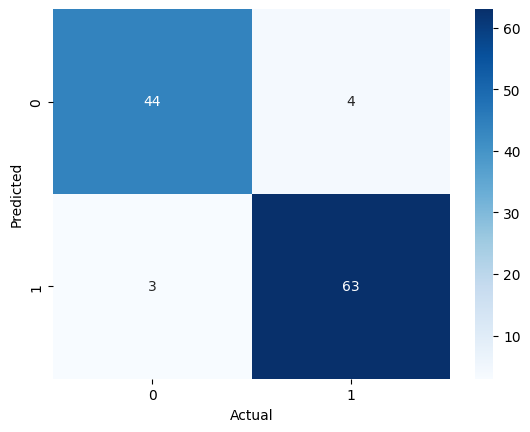

In [33]:
dtc_cfm = confusion_matrix(y_test, dtc_pred)
sns.heatmap(dtc_cfm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.show()

Confusion matrix for decision tree shows that it did few mistakes when classifying both 1 and 0, which means Decision Tree in comparison to other models showing lower perfomance.

In [34]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.94      0.95      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [35]:
dtc_acc = dtc.score(X_test, y_test)
dtc_acc

0.9385964912280702

# Random Forest

In machine learning we have a methos ensembling, which helps to improve classical models like Decision tree. It merges prediction of multiple models to get better performance and higher accuracy. Random forest is a model that uses ensamble learning techniques, in particular begging technic. Begging technic is creating multiple models and giving them different subsets of our data. In the case of Random Forest it creates multiple Decision Tree models and gives them different samples of the data, then it's time for voting. In Random Forest voting utilized by "majority voting", it means when all models gives final results we will get as an output the value that the most models gave. As an example, we gave data point to 5 models and 4 of them in results said thatthis data points belongs to class 1 and only 1 model said that it belongs to class 0, by majority voting model will choose class 1 as the final output.

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train,y_train)

<ipython-input-91-f1986ab1905f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=5)

In [92]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0])

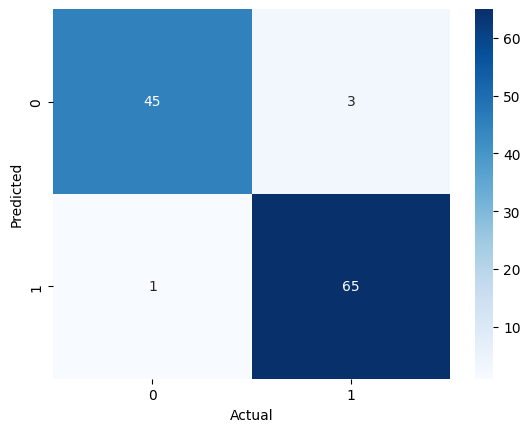

In [93]:
rfc_cfm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_cfm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Random Forest confusion matrix gives us insight on performance of the model. In this case:


1.   Model predicted 45 class 0 correctly, but misclassified 1
2.   It incorrectly predicted 3 instances as class 0, when they are class 1, correctly classfied 65 of class 1.



In [94]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [95]:
rfc_acc = rfc.score(X_test,y_test)
rfc_acc

0.9649122807017544

# Report

In [107]:
accuracies = {
    "Logistic Regression" : lr_acc,
    "KNN" : knn_acc,
    "Decision Tree" : dtc_acc,
    "Random Forest" : rfc_acc
}

for model,accuracy in accuracies.items():
  print(f"{model} accuracy: {accuracy}")

Logistic Regression accuracy: 0.956140350877193
KNN accuracy: 0.9298245614035088
Decision Tree accuracy: 0.9385964912280702
Random Forest accuracy: 0.9649122807017544


In this project, I conducted a classification task on the Breast Cancer dataset. The objective was to build machine learning models to predict whether breast tumors are malignant or benign based on various features.
After thorough experimentation and evaluation, the Random Forest model demonstrated the best performance among the classifiers tested. It achieved the highest accuracy, precision, recall, and F1-score on the testing set. The Random Forest model effectively leveraged the collective knowledge of multiple decision trees to make accurate predictions on the breast cancer dataset.

As i said before it uses ensamble method and in my next project i will explain all about ensamble methods and will create few models that uses this technic.